## Overview

The market research team at StrideSphere aims to understand the target audience characteristics for each treadmill model in the company's portfolio to enhance product recommendations for new customers. To achieve this, the team plans to analyze customer profiles and identify potential differences in customer attributes across the product range.

The analysis will involve conducting descriptive analytics to create a detailed customer profile for each treadmill model using appropriate tables and visualizations. For each model, the team will develop two-way contingency tables, calculate marginal and conditional probabilities, and provide insights into the findings. These insights will guide business decisions and improve product alignment with customer needs.

Product Portfolio:

- KP281: An entry-level treadmill priced at $1,500.

- KP481: A mid-range treadmill for mid-level runners, priced at $1,750.

- KP781: A high-end treadmill with advanced features, priced at $2,500.

## Data Exploration and Processing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [4]:
dataset_path = "StrideSphere_treadmill_data.csv"
StrideSphere_df = pd.read_csv(dataset_path)

In [5]:
#Reading dataframe
StrideSphere_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [7]:
#Shape of the dataframe
StrideSphere_df.shape

(180, 9)

In [8]:
#Name of each column in dataframe
StrideSphere_df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [68]:
StrideSphere_df['Product'] = StrideSphere_df['Product'].astype('category')
StrideSphere_df['Gender'] = StrideSphere_df['Gender'].astype('category')
StrideSphere_df['MaritalStatus'] = StrideSphere_df['MaritalStatus'].astype('category')

In [69]:
StrideSphere_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [11]:
numeric_cols = StrideSphere_df.select_dtypes(include=['number'])
skew_values = numeric_cols.skew()
print(skew_values)

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64


## Statistical Summary

In [12]:
StrideSphere_df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


### Observations

- There are no missing values i the data.
- There are 3 unique products in the dataset.
- KP281 is the most frequent product.
- Minimum and Maximum age of a person is 18 & 50, mean is 28.79, and 75% of persons have an age less than or equal to 33.
- Most of the people are having 16 years of education, i.e., 75% of persons are having education <= 16 years.
- Out of 180 data points, 104's gender is Male and rest are the Female.
- Standard Deviation for Income & Miles is very high. These variables might have outliers in them.

In [13]:
#Missing Value Detection
StrideSphere_df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [14]:
#Missing duplicate values in the dataset
StrideSphere_df.duplicated(subset=None,keep='first').sum()

0

## Non-Graphical Analysis

### Value Counts

In [15]:
StrideSphere_df["Product"].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [16]:
StrideSphere_df["Gender"].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [17]:
StrideSphere_df["MaritalStatus"].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

### Unique Attributes

In [18]:
StrideSphere_df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [19]:
StrideSphere_df["Product"].unique()

['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']

In [20]:
StrideSphere_df["Age"].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [21]:
StrideSphere_df["Gender"].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [22]:
StrideSphere_df["Education"].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [23]:
StrideSphere_df["Usage"].unique()

array([3, 2, 4, 5, 6, 7], dtype=int64)

In [24]:
StrideSphere_df["MaritalStatus"].unique()

['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']

In [25]:
StrideSphere_df["Income"].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508], dtype=int64)

In [26]:
StrideSphere_df["Fitness"].unique()

array([4, 3, 2, 1, 5], dtype=int64)

In [27]:
StrideSphere_df["Miles"].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360], dtype=int64)

## Graphical Analysis

### Univariate Analysis - Numerical Variables

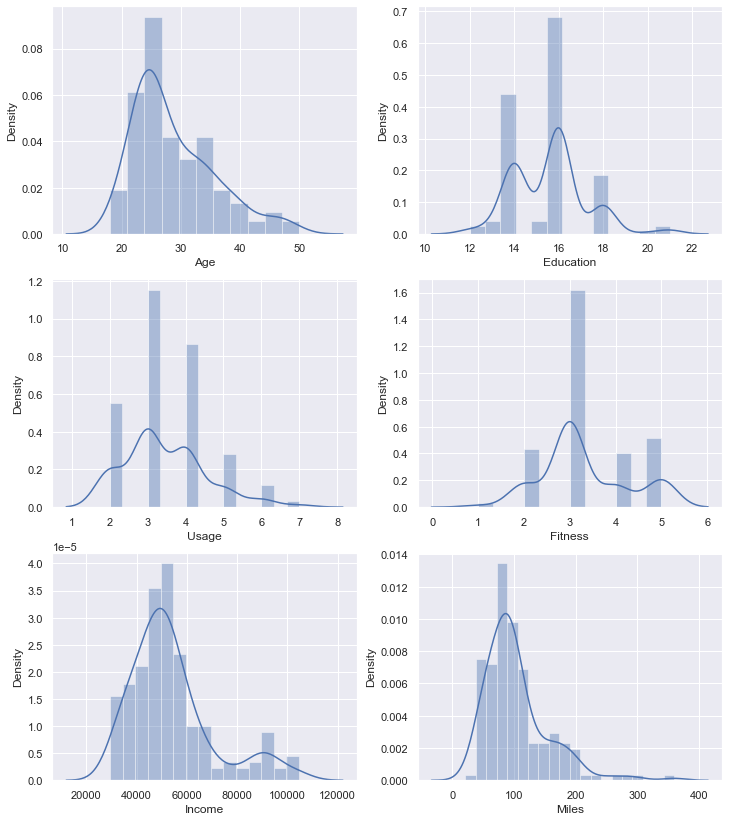

In [28]:
## Distance Plot

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12,10))
fig.subplots_adjust(top=1.2)

sns.distplot(StrideSphere_df['Age'], kde=True, ax=axis[0,0])
sns.distplot(StrideSphere_df['Education'], kde=True, ax=axis[0,1])
sns.distplot(StrideSphere_df['Usage'], kde=True, ax=axis[1,0])
sns.distplot(StrideSphere_df['Fitness'], kde=True, ax=axis[1,1])
sns.distplot(StrideSphere_df['Income'], kde=True, ax=axis[2,0])
sns.distplot(StrideSphere_df['Miles'], kde=True, ax=axis[2,1])
plt.show()

### Observations:

- Both 'Miles' and 'Income' have significant outliers based on the above distribution.
- Also 'Miles' and 'Income' are "right-skewed distribution" which means the mass of the distribution is concentrated on the left of the figure.
- Customer with fitness level 3 buy a major chuck of treadmills.
- Majority of Customers fall within the $45,000 - $60,000 income range

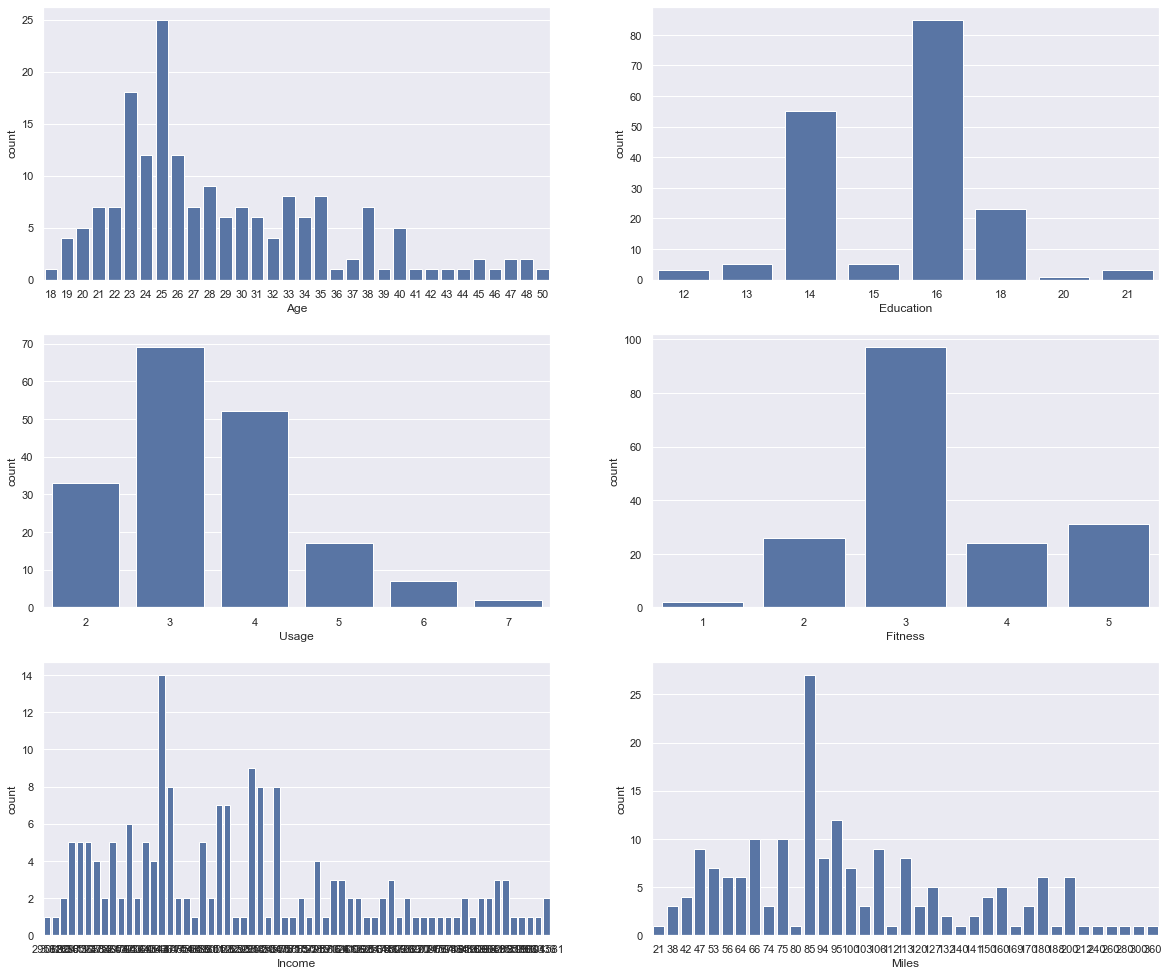

In [29]:
## Count Plot

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20,12))
fig.subplots_adjust(top=1.2)

sns.countplot(data=StrideSphere_df, x="Age", ax=axis[0,0])
sns.countplot(data=StrideSphere_df, x="Education", ax=axis[0,1])
sns.countplot(data=StrideSphere_df, x="Usage", ax=axis[1,0])
sns.countplot(data=StrideSphere_df, x="Fitness", ax=axis[1,1])
sns.countplot(data=StrideSphere_df, x="Income", ax=axis[2,0])
sns.countplot(data=StrideSphere_df, x="Miles", ax=axis[2,1])
plt.show()

### Observations-

- Young people at age of 25 are more conscious about health and are using treadmills more than old aged people.

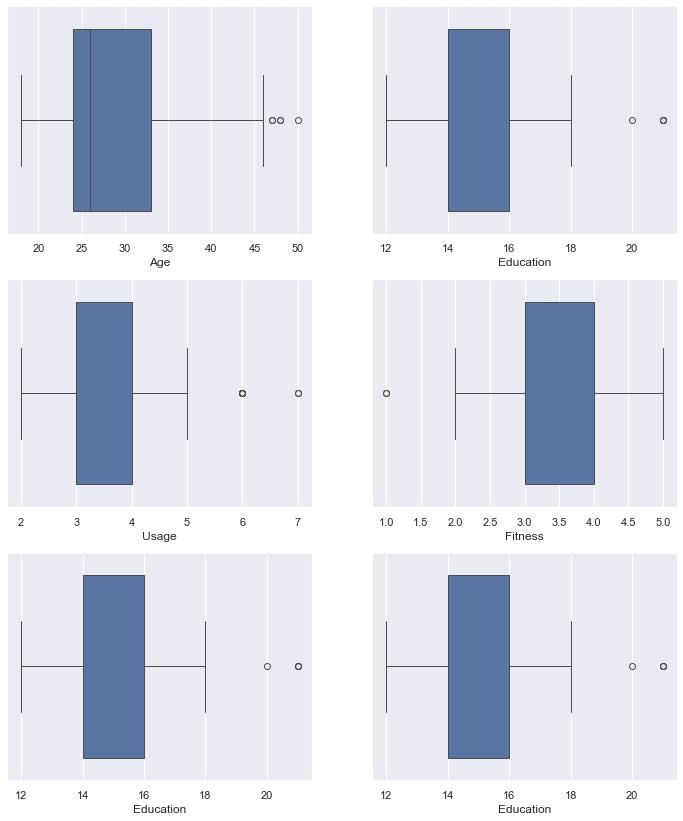

In [30]:
## Box plot
fig, axis = plt.subplots(nrows=3, ncols=2,figsize=(12,10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=StrideSphere_df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=StrideSphere_df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=StrideSphere_df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=StrideSphere_df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=StrideSphere_df, x="Education", orient='h', ax=axis[2,0])
sns.boxplot(data=StrideSphere_df, x="Education", orient='h', ax=axis[2,1])
plt.show()

### Observations-

- 'Age', 'Education', and 'Usage' have very few outliers.
- While 'Income' and 'Miles' have more outliers.

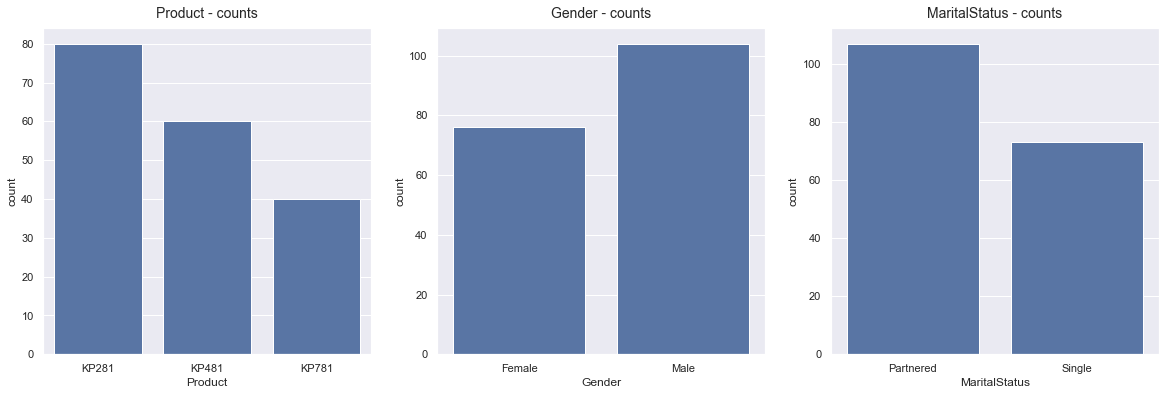

In [31]:
## Count Plot
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
sns.countplot(data=StrideSphere_df, x='Product', ax=axs[0])
sns.countplot(data=StrideSphere_df, x='Gender', ax=axs[1])
sns.countplot(data=StrideSphere_df, x='MaritalStatus', ax=axs[2])

axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)
plt.show()

### Observations-

- KP281 is the most frequent product and best-selling product.
- In Gender, there are more 'Males' who are using treadmills than 'Females'.
- The treadmills are more likely to be purchased by 'partnered' people

### Bivariate Analysis

Checking if features have any effect on the product purchased.

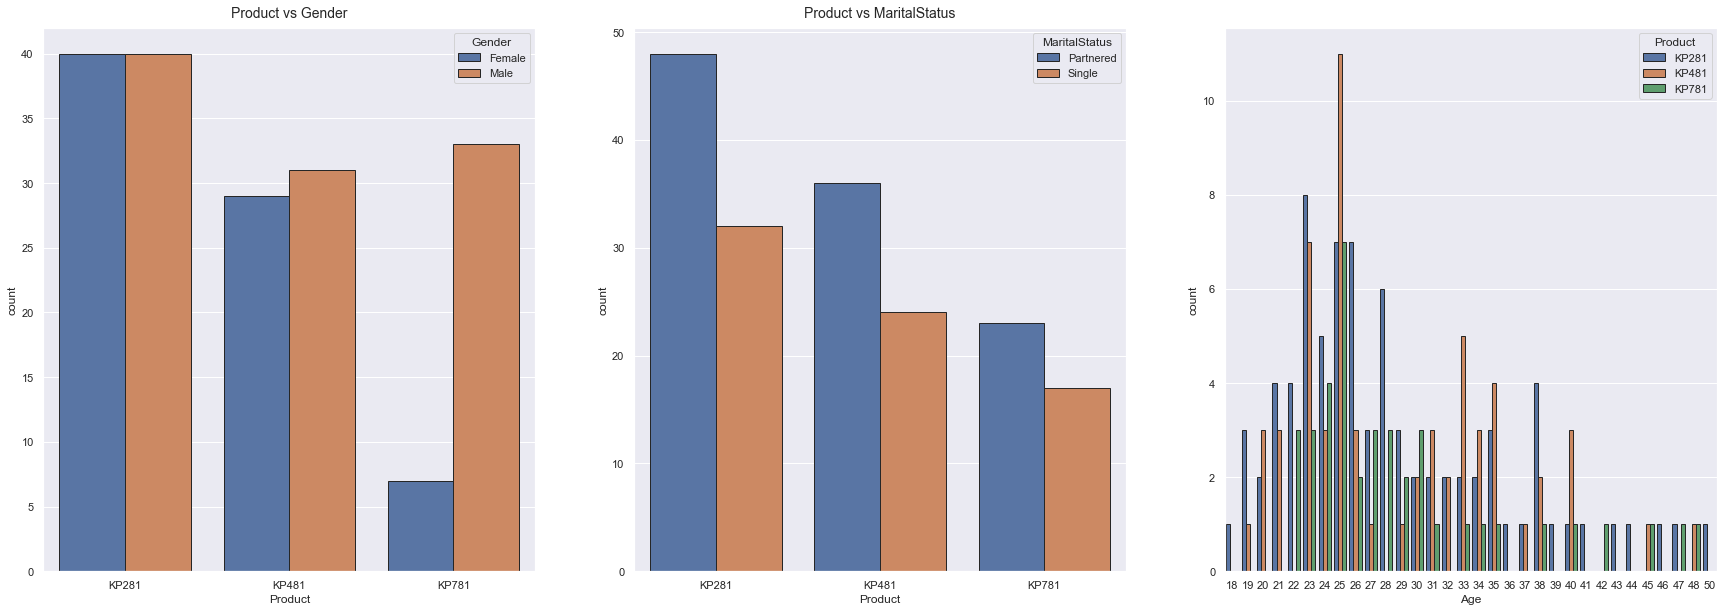

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,10))
sns.countplot(data=StrideSphere_df, x='Product', hue='Gender',  edgecolor="0.15", ax=axs[0])
sns.countplot(data=StrideSphere_df, x='Product', hue='MaritalStatus',  edgecolor="0.15", ax=axs[1])
sns.countplot(data=StrideSphere_df, x='Age', hue='Product',  edgecolor="0.15", ax=axs[2])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

### Observations-

Product vs Gender-
1. Equal number of males and females have purchased KP281 product and Almost same for the product KP481.
2. Most of the Male customers have purchased the KP781 product.

Product vs MaritalStatus
1. Customer who is Partnered, is more likely to purchase the product.

Age vs Product
1. Customer with Age of 25 are more likely to purchase the KP481 product.

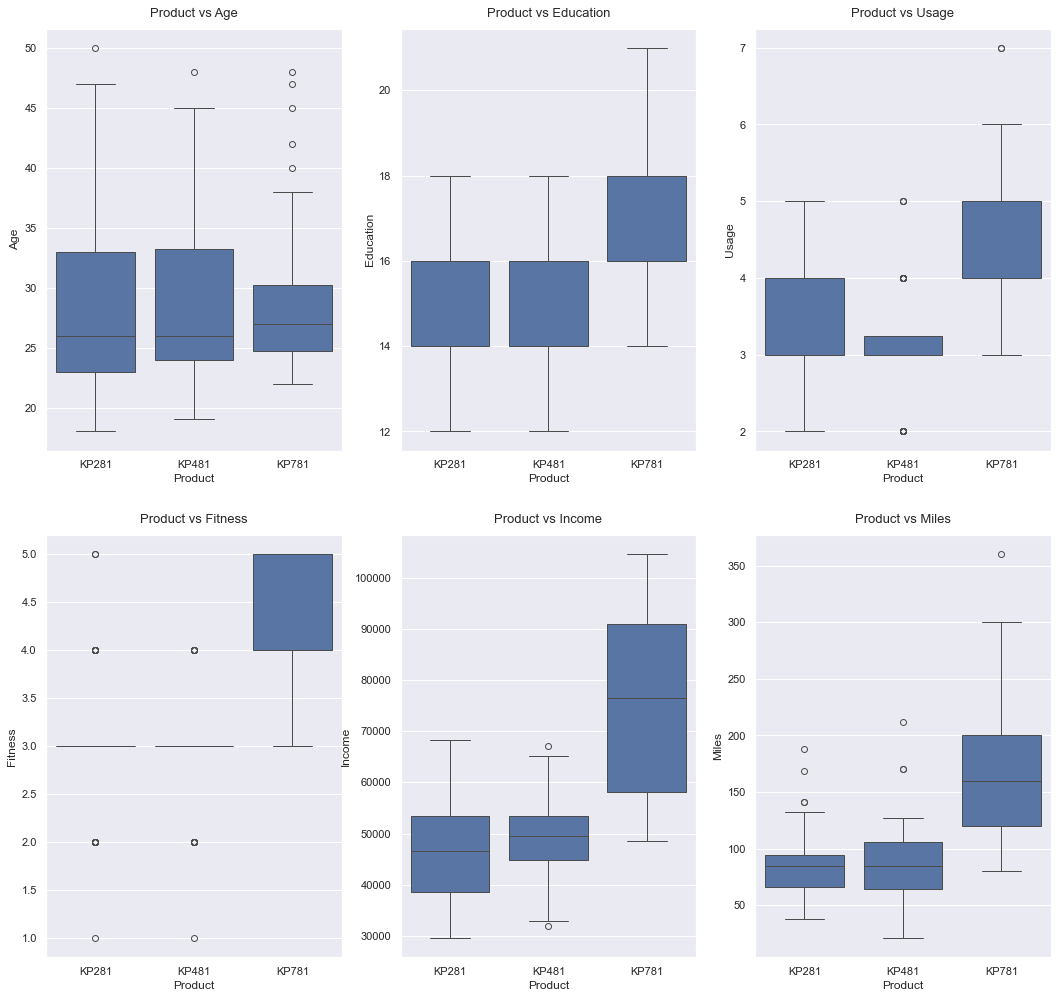

In [33]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes=True)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=StrideSphere_df, x='Product', y=attributes[count], ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1

### Observations-

Product Vs Age
1. Customers purchasing products KP281 & KP481 are having same Age median value.
2. Customers whose age lies between 25-30, are more likely to buy the KP781 product.

Product Vs Education-
1. Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
2. While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.

Product Vs Usage
1. Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
2. While the customers are likely to purchase KP281 or KP481.

Product Vs Fitness
1. The more the customer is fit (fitness >= 3), the higher the chances of purchasing the KP781 product.

Product Vs Income
1. The higher the Income of the customer (Income >= 60,000), the higher the chances of the customer purchasing the KP781 product.

Product vs Miles
1. The customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy the KP781 product.

### Multivariate Analysis

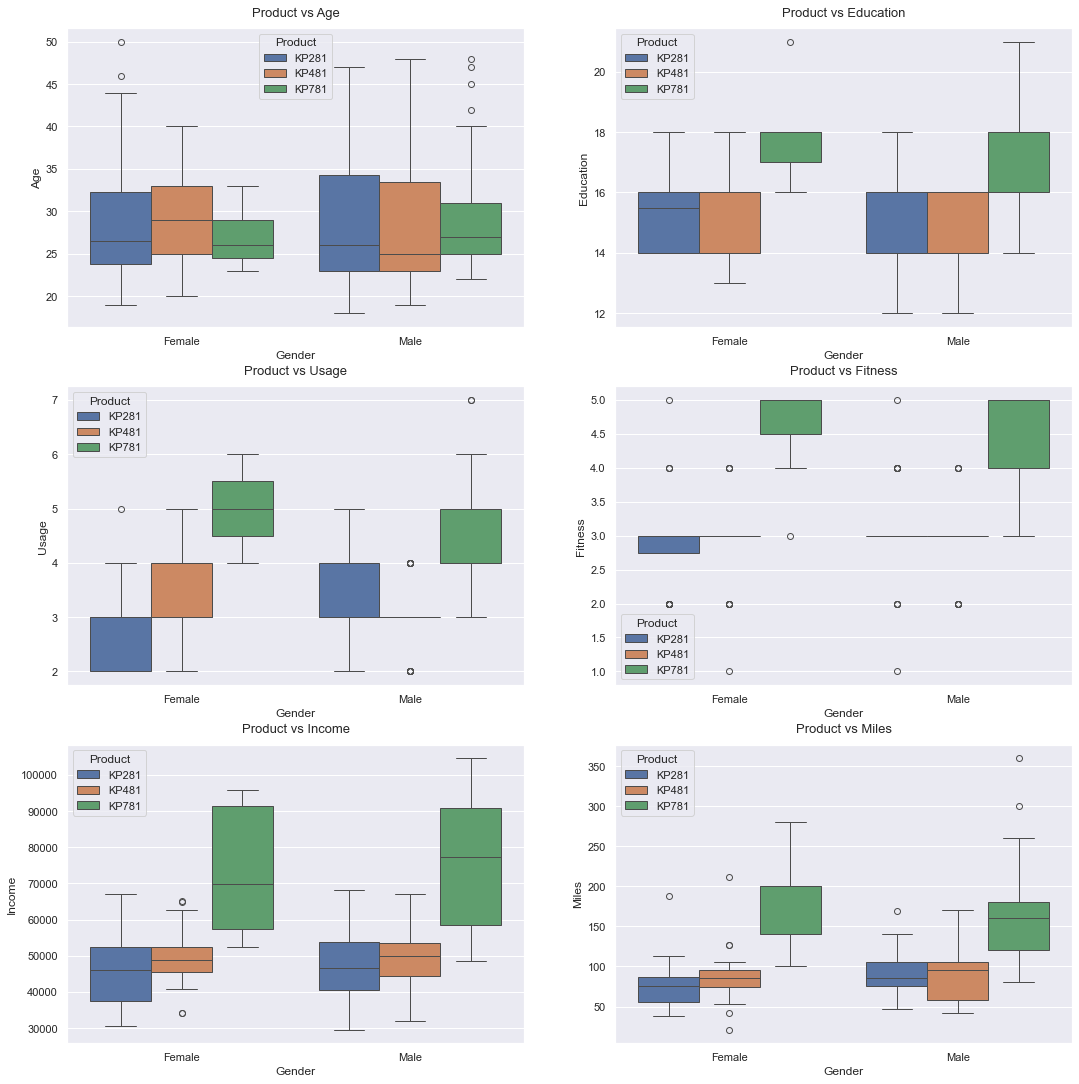

In [34]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18,12))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=StrideSphere_df, x='Gender', y=attributes[count], hue='Product', ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1

### Observations-

- Females planning to use the treadmill 3-4 times a week, are more likely to buy the product KP481 product.

### Correlation Analysis

In [36]:
numeric_df = StrideSphere_df.select_dtypes(include=[float, int])
covariance_matrix = numeric_df.cov()
print(covariance_matrix)

                    Age     Education        Usage      Fitness        Income  \
Age           48.212166      3.149410     0.113470     0.406828  5.884446e+04   
Education      3.149410      2.614867     0.693172     0.636623  1.670472e+04   
Usage          0.113470      0.693172     1.176785     0.695469  9.303043e+03   
Fitness        0.406828      0.636623     0.695469     0.919429  8.467925e+03   
Income     58844.463439  16704.717815  9303.042582  8467.925388  2.724706e+08   
Miles         13.186530     25.770795    42.709808    39.073246  4.652654e+05   

                   Miles  
Age            13.186530  
Education      25.770795  
Usage          42.709808  
Fitness        39.073246  
Income     465265.361887  
Miles        2689.833489  


In [38]:
numeric_df = StrideSphere_df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.280496  0.015064  0.061105  0.513414  0.036618
Education  0.280496   1.000000  0.395155  0.410581  0.625827  0.307284
Usage      0.015064   0.395155  1.000000  0.668606  0.519537  0.759130
Fitness    0.061105   0.410581  0.668606  1.000000  0.535005  0.785702
Income     0.513414   0.625827  0.519537  0.535005  1.000000  0.543473
Miles      0.036618   0.307284  0.759130  0.785702  0.543473  1.000000


### Heatmaps

In [41]:
numeric_df = StrideSphere_df.select_dtypes(include=[float, int])

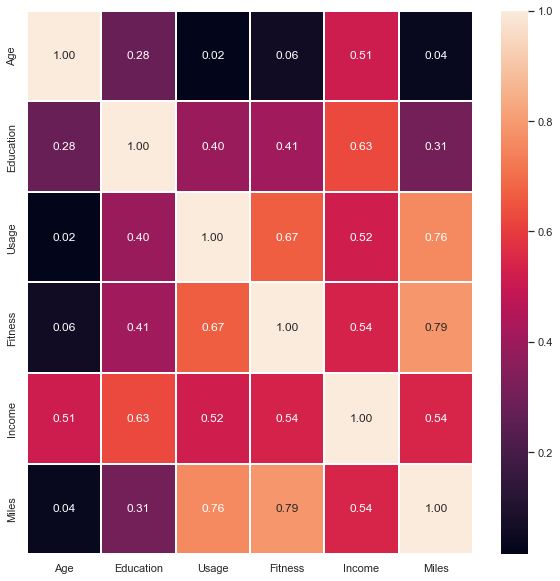

In [42]:
fig, ax = plt.subplots(figsize=(10,10))
sns.set(color_codes=True)
sns.heatmap(numeric_df.corr(), ax=ax, annot=True, linewidth=0.05, fmt='.2f')
plt.show()

### Observations-

1. (Miles & Fitness) and (Miles & Usage) attributes are highly correlated, which means if a customer's fitness level is high they use more treadmills.
2. Income and Education shows a strong correlation. High-income and highly educated people prefer the KP781 treadmill which is having advanced features.
3. There is no correlation between (Usage & Age) or (Fitness & Age) attributes, which mean Age should not be a barrier to using treadmills or specific model of treadmills.

## Pair Plots

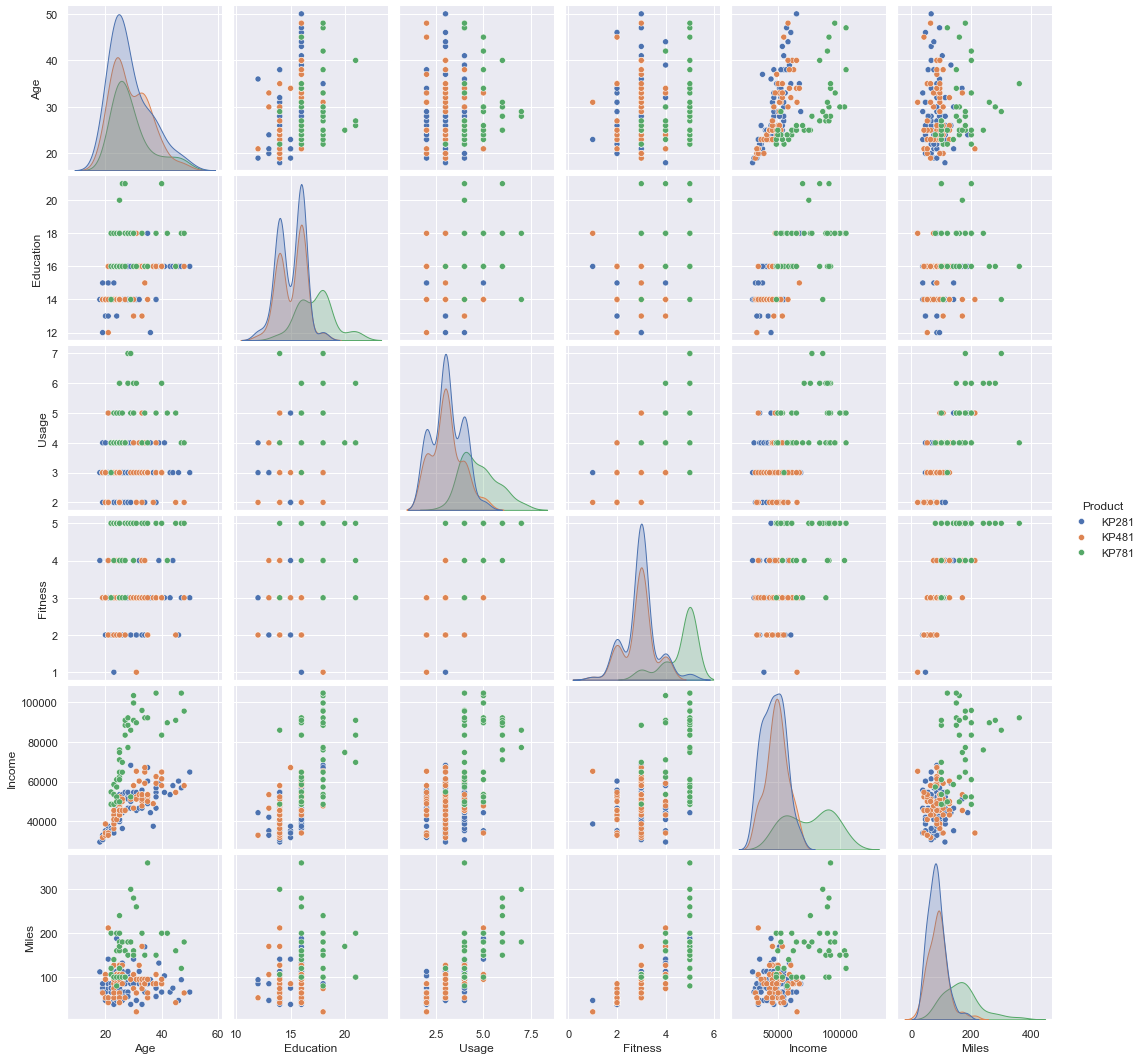

In [67]:
### Pair Plots
sns.pairplot(StrideSphere_df, hue="Product")
plt.show()

## Marginal and Conditional Probabilities

What percent of customers have purchased KP281, KP481, or KP781?

In [45]:
StrideSphere_df1 = StrideSphere_df[['Product', 'Gender', 'MaritalStatus']].melt()
(StrideSphere_df1.groupby(['variable', 'value'])[['value']].count()/len(StrideSphere_df)).mul(100).round(3).astype(str) + '%'

value
variable      value             
Gender        Female     42.222%
              Male       57.778%
MaritalStatus Partnered  59.444%
              Single     40.556%
Product       KP281      44.444%
              KP481      33.333%
              KP781      22.222%

### Observations-

Product

a)- 44.44% of the customers have purchased KP281 product.

b)- 33.33% of the customers have purchased KP481 product.

c)- 22.22% of the customers have purchased KP781 product.

Gender

a)- 57.78% of the customers are Male.

MaritalStatus

a)- 59.44% of the customers are Partnered.

#### What is the probability of a customer based on 'Gender' (Male or Female) buying a certain treadmill 'Product'?

In [46]:
def p_prod_given_gender(gender, print_marginal=False):
    if gender is not "Female" and gender is not "Male":
        return "Invalid Gender Value"
    StrideSphere_df1 = pd.crosstab(index=StrideSphere_df['Gender'], columns=[StrideSphere_df['Product']])
    p_281 = StrideSphere_df1['KP281'][gender] / StrideSphere_df1.loc[gender].sum()
    p_481 = StrideSphere_df1['KP481'][gender] / StrideSphere_df1.loc[gender].sum()
    p_781 = StrideSphere_df1['KP781'][gender] / StrideSphere_df1.loc[gender].sum()
    if print_marginal:
            print(f"P(Male): {StrideSphere_df1.loc['Male'].sum()/len(StrideSphere_df):.2f}")
            print(f"P(Female): {StrideSphere_df1.loc['Female'].sum()/len(StrideSphere_df):.2f}\n")
    print(f"P(KP281/{gender}): {p_281:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP781/{gender}): {p_781:.2f}\n")
p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP281/Male): 0.38
P(KP481/Male): 0.30
P(KP781/Male): 0.32

P(KP281/Female): 0.53
P(KP481/Female): 0.38
P(KP781/Female): 0.09



#### What is the probability of a customer based on 'MaritalStatus' (Single or Partnered) buying a certain treadmill 'Product'?

In [47]:
def p_prod_given_mstatus(status, print_marginal=False):
    if status is not "Single" and status is not "Partnered":
        return "Invalid marital Status value."
    StrideSphere_df1 = pd.crosstab(index=StrideSphere_df['MaritalStatus'], columns=[StrideSphere_df['Product']])
    p_281 = StrideSphere_df1['KP281'][status]/ StrideSphere_df1.loc[status].sum()
    p_481 = StrideSphere_df1['KP481'][status]/ StrideSphere_df1.loc[status].sum()
    p_781 = StrideSphere_df1['KP781'][status]/ StrideSphere_df1.loc[status].sum()
    if print_marginal:
        print(f"P(Single): {StrideSphere_df1.loc['Single'].sum()/len(StrideSphere_df):.2f}")
        print(f"P(Partnered): {StrideSphere_df1.loc['Partnered'].sum()/len(StrideSphere_df):.2f}\n")
    print(f"P(KP281/{status}): {p_281:.2f}")
    print(f"P(KP481/{status}): {p_481:.2f}")
    print(f"P(KP781/{status}): {p_781:.2f}\n")
p_prod_given_mstatus('Single', True)
p_prod_given_mstatus('Partnered')

P(Single): 0.41
P(Partnered): 0.59

P(KP281/Single): 0.44
P(KP481/Single): 0.33
P(KP781/Single): 0.23

P(KP281/Partnered): 0.45
P(KP481/Partnered): 0.34
P(KP781/Partnered): 0.21



### Product-Gender

In [49]:
product_gender = pd.crosstab(index=StrideSphere_df['Product'], columns=[StrideSphere_df['Gender']], margins=True)
product_gender

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [47]:
#Percentage of a male customer purchasing a treadmill
prob = round((product_gender['Male']['All'] / product_gender['All']['All']),2)
pct = round(prob*100,2)
pct

58.0

In [50]:
# Percentage of a Female customer purchasing KP781 treadmill
prob = round((product_gender['Female']['KP781'] / product_gender['All']['All']),2)
pct = round(prob*100,2)
pct

4.0

In [51]:
# Probability of a customer being a Female given that Product is KP281
#P(A|B) = P(A,B)/P(B) - Bayes' Theorem
#P(Female|KP281) = P(Female,KP281)/P(KP281)

prob = round((product_gender['Female']['KP281'] / product_gender['All']['KP281']),2)
pct = round(prob*100,2)
pct

50.0

### Observations:

- Female customer prefer to buy KP281 & KP481
- 50% of female tend to purchase treadmill model KP281

### Product-Age

In [52]:
StrideSphere_df2 = StrideSphere_df.copy()

In [54]:
# Extracting 2 new features from Age:
# "AgeCategory" - Teens, 20s, 30s and Above 40s
# "AgeGroup" - 14-20 , 20-30, 30-40 & 40-60

bins = [14,20,30,40,60]
labels =["Teens","20s","30s","Above 40s"]
StrideSphere_df2['AgeGroup'] = pd.cut(StrideSphere_df2['Age'], bins)
StrideSphere_df2['AgeCategory'] = pd.cut(StrideSphere_df2['Age'], bins,labels=labels)

In [55]:
StrideSphere_df2.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory
175,KP781,40,Male,21,Single,6,5,83416,200,"(30, 40]",30s
176,KP781,42,Male,18,Single,5,4,89641,200,"(40, 60]",Above 40s
177,KP781,45,Male,16,Single,5,5,90886,160,"(40, 60]",Above 40s
178,KP781,47,Male,18,Partnered,4,5,104581,120,"(40, 60]",Above 40s
179,KP781,48,Male,18,Partnered,4,5,95508,180,"(40, 60]",Above 40s


In [56]:
product_age = pd.crosstab(index=StrideSphere_df2['Product'], columns=[StrideSphere_df2['AgeCategory']],margins=True)
product_age

AgeCategory,Teens,20s,30s,Above 40s,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180


In [57]:
# Percentage of customers with Age between 20s and 30s among all customers
prob = round((product_age['20s']['All'] / product_age['All']['All']),2)
pct = round(prob*100,2)
pct

61.0

### Observations-

- Teens don't prefer to buy KP781
- 61% of customers are between 20 and 30 years old

## Outlier Detection

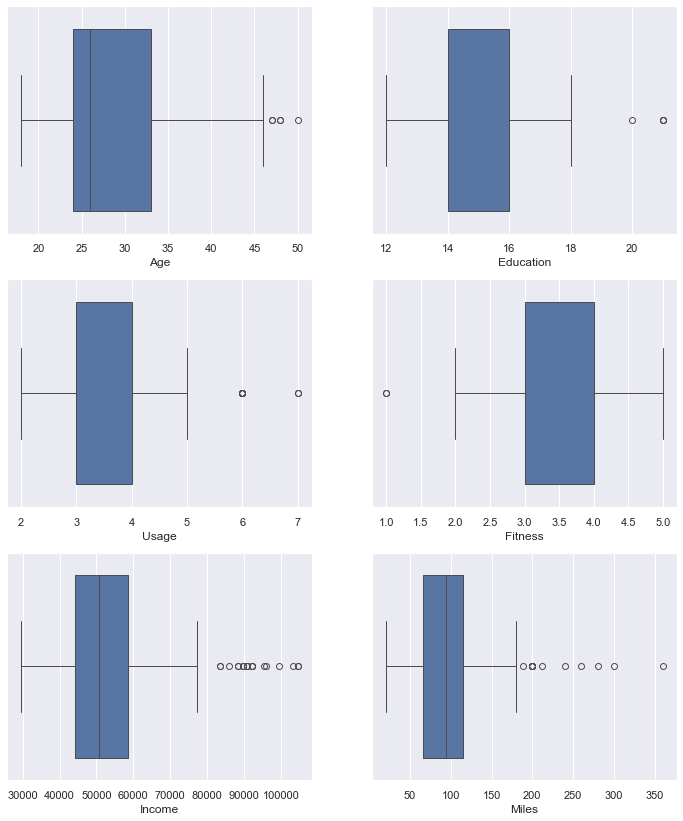

In [59]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=StrideSphere_df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=StrideSphere_df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=StrideSphere_df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=StrideSphere_df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=StrideSphere_df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=StrideSphere_df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

### Observations

- Age, Education and Usage are having very few outliers.
- Income and Miles are having more outliers.
- Only a few of our customers run more than 180 miles per week

### Outlier Handling for 'Income' Feature

In [60]:
StrideSphere_df1 = StrideSphere_df.copy()

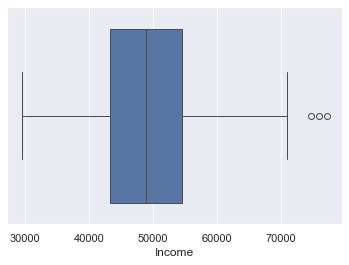

In [61]:
#Outlier Treatment: Removing top 5% & bottom 1% of the Column Outlier values
Q3 = StrideSphere_df1['Income'].quantile(0.75)
Q1 = StrideSphere_df1['Income'].quantile(0.25)
IQR = Q3-Q1
StrideSphere_df1 = StrideSphere_df1[(StrideSphere_df1['Income'] > Q1 - 1.5*IQR) & (StrideSphere_df1['Income'] < Q3 + 1.5*IQR)]

sns.boxplot(data=StrideSphere_df1, x="Income", orient='h')
plt.show()

### Outlier Handling for 'Income' Feature

In [62]:
StrideSphere_df1 = StrideSphere_df.copy()

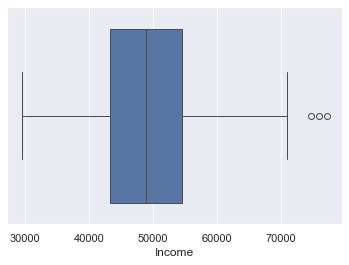

In [63]:
#Outlier Treatment: Removing top 5% & bottom 1% of the Column Outlier values
Q3 = StrideSphere_df1['Income'].quantile(0.75)
Q1 = StrideSphere_df1['Income'].quantile(0.25)
IQR = Q3-Q1
StrideSphere_df1 = StrideSphere_df1[(StrideSphere_df1['Income'] > Q1 - 1.5*IQR) & (StrideSphere_df1['Income'] < Q3 + 1.5*IQR)]

sns.boxplot(data=StrideSphere_df1, x="Income", orient='h')
plt.show()

### Outlier Handling for 'Miles' Feature

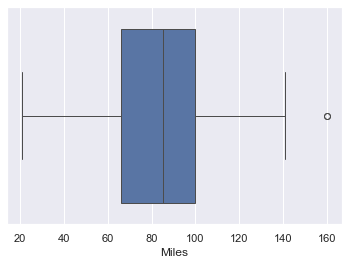

In [64]:
#Outlier Treatment: Removing top 5% & bottom 1% of the Column Outlier values
Q3 = StrideSphere_df1['Miles'].quantile(0.75)
Q1 = StrideSphere_df1['Miles'].quantile(0.25)
IQR = Q3-Q1
StrideSphere_df1 = StrideSphere_df1[(StrideSphere_df1['Miles'] > Q1 - 1.5*IQR) & (StrideSphere_df1['Miles'] < Q3 + 1.5*IQR)]

sns.boxplot(data=StrideSphere_df1, x="Miles", orient='h')
plt.show()

In [65]:
# Before removal of Outliers
StrideSphere_df.shape

(180, 9)

In [66]:
# After removal of Outliers
StrideSphere_df1.shape

(147, 9)

While there are outliers, they may provide many insights for high-end models that can benefit companies more. Therefore, they should not be removed for further analysis.

## Actionable Insights & Recommendations

### Actionable Insights:
- Best-Selling Model: The KP281 is the most popular product, accounting for 44% of all treadmill sales.
- Income Trends: A significant proportion of customers (83%) who purchase treadmills have incomes ranging between $35,000 and $85,000.
- The majority fall within the $45,000–$80,000 income bracket.
- Only 8% of customers earning below $35,000 buy treadmills.
- Age Group: 88% of treadmill customers are aged between 20 and 40 years.
  
### Usage Patterns:
- Correlation: A strong positive correlation exists between fitness levels and treadmill usage, with higher fitness levels linked to greater usage.
- High-End Usage: Customers with fitness levels of 4 and 5 use high-end treadmills, averaging over 150 miles per week.
- Premium Model: The KP781 is the only model purchased by customers with more than 20 years of education and incomes exceeding $85,000.

### Recommendations:
- Affordable Models: Position KP281 and KP481 as budget-friendly options targeting customers in the $45,000–$60,000 income range.
- Premium Model Strategy: Market the KP781 as a premium product, emphasizing its suitability for high-income customers with over 20 years of education.
- Expand Customer Base:Conduct market research to explore ways to attract customers earning below $35,000, potentially offering entry-level models or financing options to broaden accessibility.